In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

In [2]:
TRAIN_DATA_DIR = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
TEST_DATA_DIR = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [3]:
IMG_SIZE = 32
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['N', 'R', 'space', 'B', 'I', 'del', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'nothing', 'J']


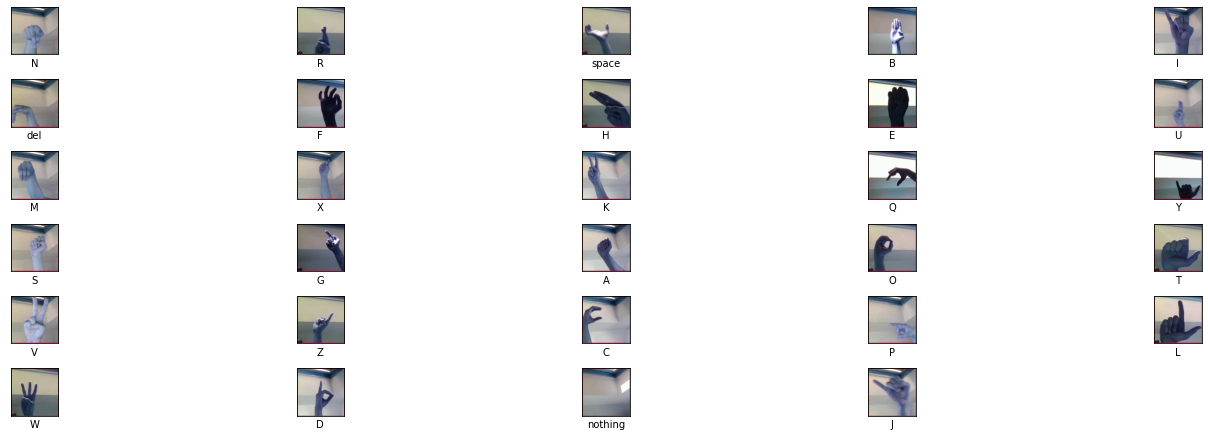

In [4]:
plt.figure(figsize=(20,10))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show()

In [5]:
def load_data(TRAIN_DATA_DIR):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in tqdm(os.listdir(TRAIN_DATA_DIR)):
        index +=1
        for image in tqdm(os.listdir(TRAIN_DATA_DIR + "/" + folder)):
            temp_img = cv2.imread(TRAIN_DATA_DIR + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(TRAIN_DATA_DIR)

100%|██████████| 29/29 [09:21<00:00, 19.35s/it]


Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)


In [6]:
model = keras.Sequential ([

layers.Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),

layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),


layers.Flatten(),
layers.Dense(units=4096,activation="relu"),
layers.Dense(units=4096,activation="relu"),
layers.Dense(units=29, activation="softmax")

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
551/551 [==============================] - 25s 38ms/step - loss: 2.8727 - accuracy: 0.1166 - val_loss: 1.2850 - val_accuracy: 0.5201
Epoch 2/5
551/551 [==============================] - 20s 36ms/step - loss: 1.0454 - accuracy: 0.6120 - val_loss: 0.5347 - val_accuracy: 0.7922
Epoch 3/5
551/551 [==============================] - 20s 36ms/step - loss: 0.3537 - accuracy: 0.8678 - val_loss: 0.1443 - val_accuracy: 0.9522
Epoch 4/5
551/551 [==============================] - 20s 36ms/step - loss: 0.1712 - accuracy: 0.9401 - val_loss: 0.1395 - val_accuracy: 0.9479
Epoch 5/5
551/551 [==============================] - 20s 36ms/step - loss: 0.1012 - accuracy: 0.9652 - val_loss: 0.0639 - val_accuracy: 0.9785


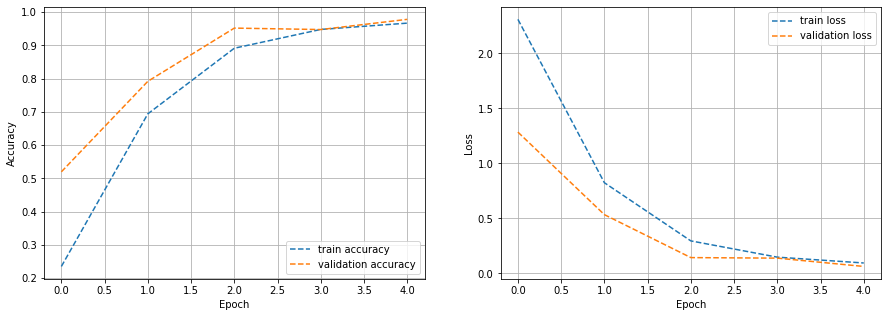

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

272/272 [==============================] - 2s 8ms/step - loss: 0.0800 - accuracy: 0.9725

Test Accuracy: 0.9725287556648254

Test Loss: 0.07995635271072388
